In [1]:
import urllib.request
import csv
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import numpy as np
headers = ['date','state','positive','negative','pending','hospitalizedCurrently','hospitalizedCumulative','inIcuCurrently','inIcuCumulative','onVentilatorCurrently','onVentilatorCumulative','recovered','dataQualityGrade','lastUpdateEt','dateModified','checkTimeEt','death','hospitalized','dateChecked','totalTestsViral','positiveTestsViral','negativeTestsViral','positiveCasesViral','fips','positiveIncrease','negativeIncrease','total','totalTestResults','totalTestResultsIncrease','posNeg','deathIncrease','hospitalizedIncrease','hash','commercialScore','negativeRegularScore','negativeScore','positiveScore','score','grade']
url = "https://covidtracking.com/api/v1/states/daily.csv"
data = pd.read_csv(url)
dfx = data.groupby("date").sum().reset_index()
dfx['date']=dfx['date'].astype(str)
dfx['date']=pd.to_datetime(dfx['date'])
#df.head()
#df.info()
df = dfx.rename(columns={'positiveIncrease':'Daily_Cases','deathIncrease':'Daily_Deaths','hospitalizedIncrease':'Daily_Hospitalizations'})

In [2]:
##Create new columns with 7 day averages

idx = df.columns.get_loc('Daily_Cases')
for i in range(3,df.shape[0]-3):
    df.loc[data.index[i],'Cases_7-Day_CMA']=(df.iloc[i-3,idx]+df.iloc[i-2,idx]+df.iloc[i-1,idx]+df.iloc[i,idx]+df.iloc[i+1,idx]+df.iloc[i+2,idx]+df.iloc[i+3,idx])/7

idx = df.columns.get_loc('Daily_Deaths')
for i in range(3,df.shape[0]-3):
    df.loc[df.index[i],'Deaths_7-Day_CMA']=(df.iloc[i-3,idx]+df.iloc[i-2,idx]+df.iloc[i-1,idx]+df.iloc[i,idx]+df.iloc[i+1,idx]+df.iloc[i+2,idx]+df.iloc[i+3,idx])/7


idx = df.columns.get_loc('Daily_Hospitalizations')
for i in range(3,df.shape[0]-3):
    df.loc[df.index[i],'Hospitalizations_7-Day_CMA']=(df.iloc[i-3,idx]+df.iloc[i-2,idx]+df.iloc[i-1,idx]+df.iloc[i,idx]+df.iloc[i+1,idx]+df.iloc[i+2,idx]+df.iloc[i+3,idx])/7




(132, 37)


Text(0, 0.5, 'Daily Hospitalizations')

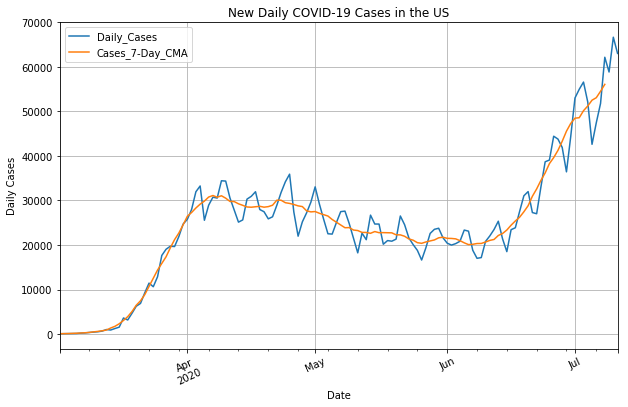

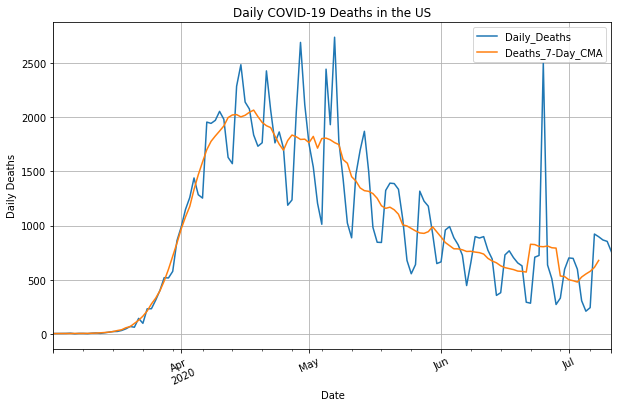

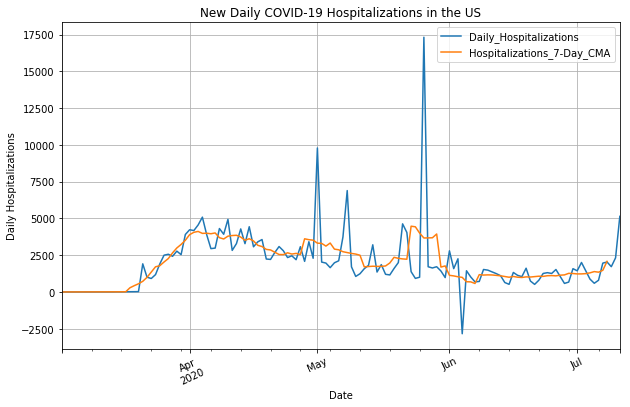

In [3]:
##Cut out early times with few cases and plot
mask = (df['date']>'2020-03-01')
df2 = df[mask]
print(df2.shape)
ax=df2.plot(x='date',y=['Daily_Cases','Cases_7-Day_CMA'],title='New Daily COVID-19 Cases in the US',grid=True, rot=25, figsize=[10,6])
ax.set_xlabel("Date")
ax.set_ylabel("Daily Cases")
ax2=df2.plot(x='date',y=['Daily_Deaths','Deaths_7-Day_CMA'],title='Daily COVID-19 Deaths in the US',grid=True, rot=25, figsize=[10,6])
ax2.set_xlabel("Date")
ax2.set_ylabel("Daily Deaths")
ax=df2.plot(x='date',y=['Daily_Hospitalizations','Hospitalizations_7-Day_CMA'],title='New Daily COVID-19 Hospitalizations in the US',grid=True, rot=25, figsize=[10,6])
ax.set_xlabel("Date")
ax.set_ylabel("Daily Hospitalizations")


